# EDA

### Import visualisation libs

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
data = pd.read_csv("data/Tweets.csv", index_col=0)

### Display basic information about the dataset

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41159 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       41158 non-null  object
 1   Sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 964.7+ KB
None


Data contains 41155 entries, all of them are not null

3 sentiments are not defined, let's drop them

### Drop nans

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41155 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       41155 non-null  object
 1   Sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 964.6+ KB


Now we have 41155 non-null values

### Display the first few rows of the dataset

In [6]:
data.head()

,Text,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Visualize the distribution of sentiment classes

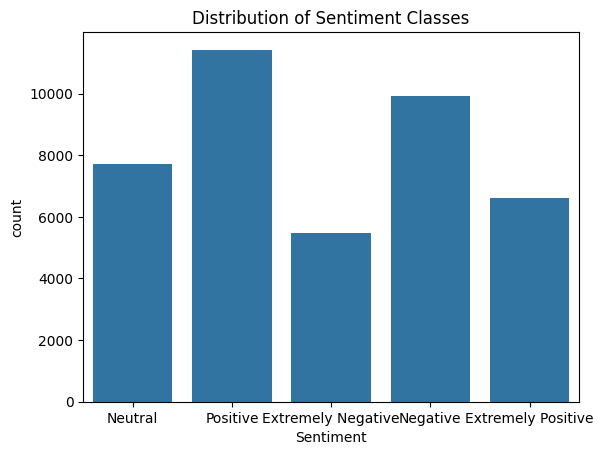

In [7]:
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiment Classes')
plt.show()

Data contains 5 sentiments (Extremely Positive, Positive, Neutral, Negative, Extremely Negative), the most of them are positive

### Display the length distribution of texts

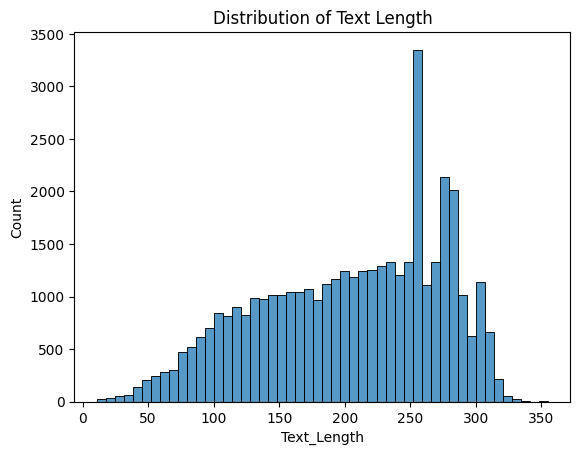

In [8]:
data['Text_Length'] = data['Text'].apply(len)
sns.histplot(data['Text_Length'], bins=50)
plt.title('Distribution of Text Length')
plt.show()

#### Let's create normalize texts function

In [9]:
import numpy as np
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text, flags=re.MULTILINE)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # You can choose either stemming or lemmatization
    # For example, using stemming:
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    
    # Check if the resulting list of words is empty
    if not words:
        return np.nan
    
    # Join the normalized words back into a string
    normalized_text = ' '.join(words)
    
    return normalized_text

[nltk_data] Downloading package punkt to /home/dzailz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dzailz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dzailz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Add normalized text to the dataset

In [10]:
data['Normalized_Text'] = data['Text'].apply(normalize_text)

Let's see the result

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41155 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             41155 non-null  object
 1   Sentiment        41155 non-null  object
 2   Text_Length      41155 non-null  int64 
 3   Normalized_Text  41128 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


In [12]:
data.head()

,Text,Sentiment,Text_Length,Normalized_Text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,NaN
1,advice Talk to your neighbours family to excha...,Positive,237,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,readi go supermarket covid19 outbreak im paran...


We have empty texts, let's drop them

#### Drop NaN's again

In [13]:
data = data.dropna()

Check if are we fine now

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41128 entries, 1 to 41156
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             41128 non-null  object
 1   Sentiment        41128 non-null  object
 2   Text_Length      41128 non-null  int64 
 3   Normalized_Text  41128 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


### Save preprocessed data

In [15]:
data.to_parquet('data/Tweets.parquet')

### Display word cloud for each sentiment class

this will help us to build a naive heuristics model

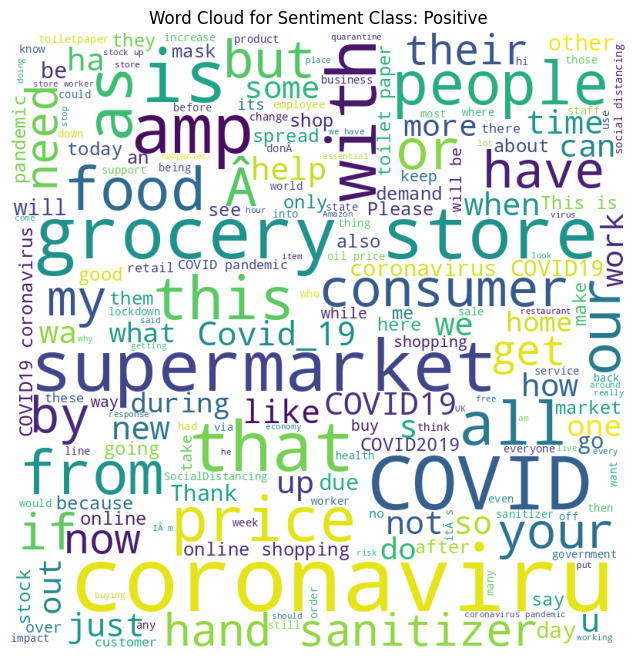

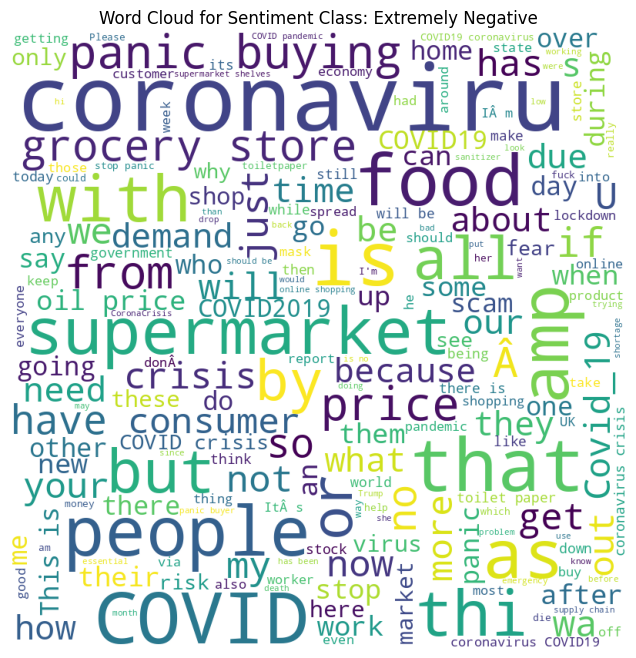

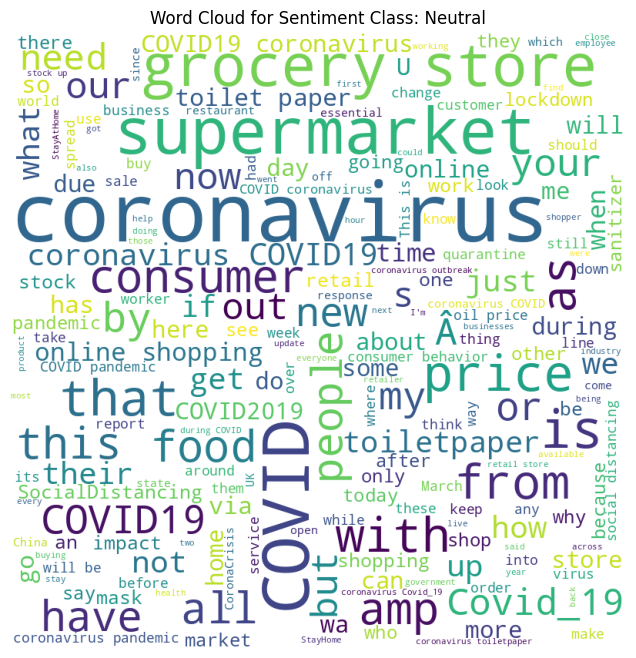

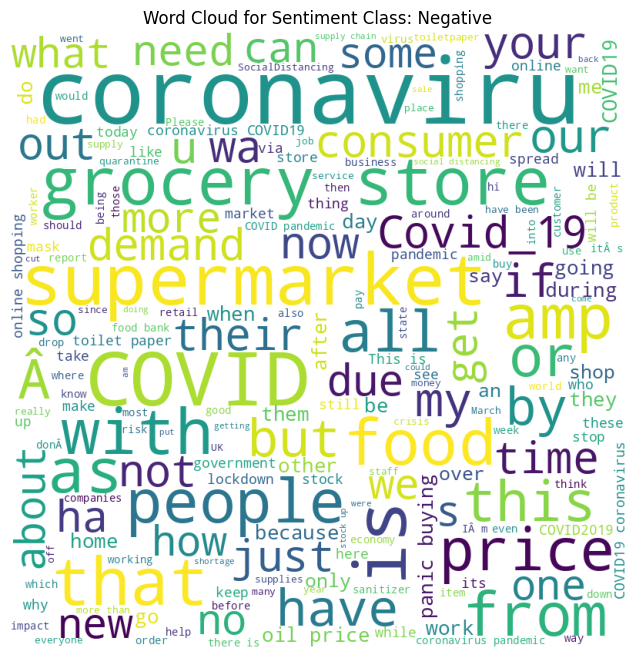

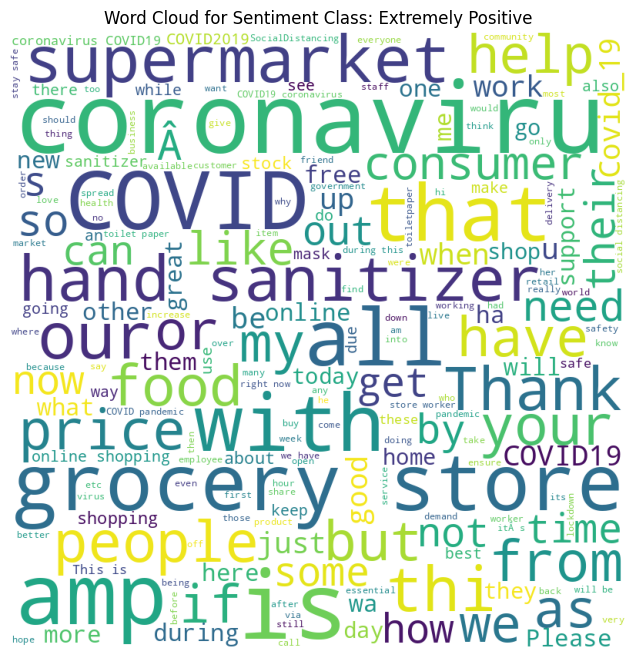

In [16]:
from wordcloud import WordCloud

for sentiment_class in data['Sentiment'].unique():
    text = " ".join(data[data['Sentiment'] == sentiment_class]['Text'])
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(['the', 'and', 'to', 'of', 'in', 'a', "at", "by" "is", 'you', 'i', 'it', 'http', 'https', 't', 'co', 'on', 'are', 'for']),
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.title(f'Word Cloud for Sentiment Class: {sentiment_class}')
    plt.show()


# Heuristic for Target Class Prediction:

#### Helpers

In [17]:
def differece_between_reports(report1: str, report2: str) -> dict:
    """
    Calculate the difference between two reports.

    Args:
        report1 (str): The first report.
        report2 (str): The second report.

    Returns:
        dict: A dictionary representing the difference between the two reports.
    """
    report1 = convert_report_to_list(report1)
    report2 = convert_report_to_list(report2)
    report1 = result_to_dict(report1)
    report2 = result_to_dict(report2)
    return differense_between_two_dict(report1, report2)

def convert_report_to_list(classification_report: str) -> list:
    return [i.strip() for i in classification_report.split('\n') if i][1:]

def extract_digits_and_create_dict(s: str) -> dict:
    parts = re.split(r'\s{2,}', s.strip())
    label = parts[0]
    values = [float(d) if '.' in d else int(d) for d in re.findall(r'\d+(?:\.\d+)?', s)]
    return {label: values}

def result_to_dict(result: list) -> list:
    result_dict = {}
    for row in result:
        result_dict.update(extract_digits_and_create_dict(row))
    return result_dict

def differense_between_two_dict(cls_rep1: dict, cls_rep2: dict) -> dict:
    diff_dict = {}
    for key in cls_rep1:
        diff_dict[key] = np.mean([round((x - y) * 100, 2) for x, y in zip(cls_rep1[key], cls_rep2[key])])
    return diff_dict



#### Define a universal method for ROC auc plots

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_pred_proba, classes=None, model_name=None):
    """
    Plot the ROC curve and calculate the ROC-AUC for a multiclass classification problem.

    Parameters:
    - y_true: True labels
    - y_pred_proba: Predicted probability estimates
    - classes: List of class labels (for better plot labels)

    Returns:
    - None (plots the ROC curve)
    """
    # Binarize the labels for multiclass classification
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true)

    # Number of classes
    n_classes = y_true_bin.shape[1]

    # Initialize plot
    plt.figure(figsize=(8, 6))

    # Calculate ROC curve for each class
    for i in range(n_classes):
        try:
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')
        except ValueError:
            # Skip classes with no positive samples
            print(f"Skipping class {lb.classes_[i]} as it has no positive samples.")

    # Plot random guessing line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Set plot properties
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve. Model {model_name}')

    if classes is not None:
        plt.legend(loc="lower right", title="Class")
    
    plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, normalize=False, cmap=plt.cm.Blues):
    """
    Plot the confusion matrix for a multiclass classification problem.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: List of class labels (for better plot labels)
    - normalize: Whether to normalize the confusion matrix
    - cmap: Colormap for the plot

    Returns:
    - None (plots the confusion matrix)
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_predicted_distribution(y_true, y_pred, classes=None, palette='viridis'):
    """
    Plot the distribution of predicted sentiments with the true sentiment hue.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: List of class labels (for better plot labels)
    - palette: Color palette for the plot

    Returns:
    - None (plots the distribution)
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_pred, hue=y_true, order=classes, palette=palette)
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Sentiments with True Sentiment Hue')
    plt.legend(title='True Sentiment')
    plt.show()

## Naive heuristic

For a naive heuristic, let's use simple keyword matching. For example, if the text contains positive words like "happy," "great," or "awesome," predict a positive sentiment.

In [21]:
def naive_heuristic(text):
    positive_words = ['happy', 'good', 'free', 'like', 'supermarket']
    extremely_positive_words = ['great', 'awesome', 'excellent', 'free', 'like', 'hand sanitizer', 'during', 'grocery store']
    negative_words = ['sad', 'bad', 'toilet paper', 'scam', 'consumer', 'panic buying']
    extremely_negative_words = ['terrible', 'awful', 'horrible', 'panic', 'scam', 'crisis', 'oil price']

    for word in positive_words:
        if word in text:
            return 'Positive'

    for word in negative_words:
        if word in text:
            return 'Negative'
        
    for word in extremely_negative_words:
        if word in text:
            return 'Extremely Negative'
        
    for word in extremely_positive_words:
        if word in text:
            return 'Extremely Positive'

    return 'Neutral'


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Split the data into training and validation sets
X_train_full_naive, X_test_full_naive, y_train_full_naive, y_test_full_naive = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

In [23]:
# Apply the naive heuristic to make predictions on the validation set
y_pred_heuristic_full_naive = X_test_full_naive.apply(naive_heuristic)
report_full_naive = classification_report(y_test_full_naive, y_pred_heuristic_full_naive)
# Evaluate the performance of the heuristic
print(f'Accuracy of Naive Heuristic: {accuracy_score(y_test_full_naive, y_pred_heuristic_full_naive)}')
print('\nClassification Report for Naive Heuristic:\n', report_full_naive)

Accuracy of Naive Heuristic: 0.2726720155604182

Classification Report for Naive Heuristic:
                     precision    recall  f1-score   support

Extremely Negative       0.36      0.20      0.26      1094
Extremely Positive       0.25      0.23      0.24      1252
          Negative       0.27      0.14      0.18      2055
           Neutral       0.24      0.54      0.33      1506
          Positive       0.31      0.28      0.29      2319

          accuracy                           0.27      8226
         macro avg       0.29      0.28      0.26      8226
      weighted avg       0.29      0.27      0.26      8226



### Conclusion:

While the Naive Heuristic model shows some capability in predicting certain classes with reasonable precision, there is room for improvement, especially considering the imbalances in class performance. Further analysis and potential model adjustments may be necessary to enhance the overall predictive performance on the dataset.

# Text Vectorization and ML Model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight

### Split the data into training and validation sets

In [25]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(data['Normalized_Text'], data['Sentiment'], test_size=0.2, random_state=42)

### Compute class weights

In [26]:
classes = y_train_nb.unique()
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_nb)

### Print the class weights

In [27]:
for class_label, weight in zip(classes, class_weights):
    print(f'Class "{class_label}": {weight:.2f}')

Class "Negative": 0.84
Class "Positive": 0.72
Class "Extremely Positive": 1.22
Class "Extremely Negative": 1.50
Class "Neutral": 1.06


### Save our class weights as dict

In [28]:
cw = dict(zip(classes, class_weights))

### Vectorize the text using CountVectorizer

In [29]:
vectorizer = CountVectorizer(analyzer='word')
X_train_vec_nb = vectorizer.fit_transform(X_train_nb)
X_test_vec_nb = vectorizer.transform(X_test_nb)

## Naive Bayes classifier

### Train a Naive Bayes classifier

In [30]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vec_nb, y_train_nb)

MultinomialNB()

### Predict on the validation set

In [31]:
nb_y_pred_proba = naive_bayes_classifier.predict_proba(X_test_vec_nb)

In [32]:
nb_y_pred_test = naive_bayes_classifier.predict(X_test_vec_nb)

### Evaluate the performance

In [33]:
roc_auc_nb = roc_auc_score(y_test_nb, nb_y_pred_proba, multi_class='ovr')  # For multiclass classification
print(f'ROC-AUC: {roc_auc_nb:.2f}')

ROC-AUC: 0.78


In [34]:
print(f'Accuracy: {accuracy_score(y_test_nb, nb_y_pred_test)}')
report_nb = classification_report(y_test_nb, nb_y_pred_test)
print('\nClassification Report:\n', report_nb)

Accuracy: 0.4759299781181619

Classification Report:
                     precision    recall  f1-score   support

Extremely Negative       0.61      0.35      0.45      1094
Extremely Positive       0.58      0.40      0.47      1252
          Negative       0.44      0.52      0.47      2055
           Neutral       0.68      0.34      0.45      1506
          Positive       0.41      0.62      0.50      2319

          accuracy                           0.48      8226
         macro avg       0.54      0.45      0.47      8226
      weighted avg       0.52      0.48      0.47      8226



## Differences between naive heuristic and naive Bayes

In [35]:
differences = differece_between_reports(report_nb, report_full_naive)
print("Percentage Differences:")
for metric, diff_percentage in differences.items():
    print(f"{metric}: {diff_percentage:.2f}%")

Percentage Differences:
Extremely Negative: 14.75%
Extremely Positive: 18.25%
Negative: 21.00%
Neutral: 9.00%
Positive: 16.25%
accuracy: 10.50%
macro avg: 15.75%
weighted avg: 16.25%


## SGDClassifier

### Import SGDClassifier

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
X_sdg = data[['Text_Length', 'Normalized_Text']]
y_sdg = data['Sentiment']

### Convert text data to TF-IDF vectors

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_vec_sdg = tfidf_vectorizer.fit_transform(X_sdg['Normalized_Text'])

### Split the data into training and testing sets

In [39]:
X_train_sdg, X_valid_sdg, y_train_sdg, y_valid_sdg = train_test_split(X_vec_sdg, y_sdg, test_size=0.2, random_state=42)

### Initialize SGDClassifier for logistic regression

In [40]:
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

### Fit the model

In [41]:
sgd_classifier.fit(X_train_sdg, y_train_sdg)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42)

### Make predictions on the validation set

In [42]:

y_pred_sdg = sgd_classifier.predict(X_valid_sdg)

### Make probability estimates on the validation set

In [43]:
y_pred_proba_sdg = sgd_classifier.predict_proba(X_valid_sdg)

### Calculate ROC-AUC

In [44]:
roc_auc_sdg = roc_auc_score(y_valid_sdg, y_pred_proba_sdg, multi_class='ovr')  # For multiclass classification
print(f'ROC-AUC: {roc_auc_sdg}')

ROC-AUC: 0.826973487436916


### Evaluate the model

In [45]:
accuracy_sdg = accuracy_score(y_valid_sdg, y_pred_sdg)
print(f'Accuracy: {accuracy_sdg}')
sdg_report = classification_report(y_valid_sdg, y_pred_sdg)
print(sdg_report)

Accuracy: 0.5322149282761974
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.42      0.51      1094
Extremely Positive       0.65      0.47      0.54      1252
          Negative       0.49      0.48      0.49      2055
           Neutral       0.58      0.62      0.60      1506
          Positive       0.47      0.60      0.53      2319

          accuracy                           0.53      8226
         macro avg       0.57      0.52      0.53      8226
      weighted avg       0.55      0.53      0.53      8226



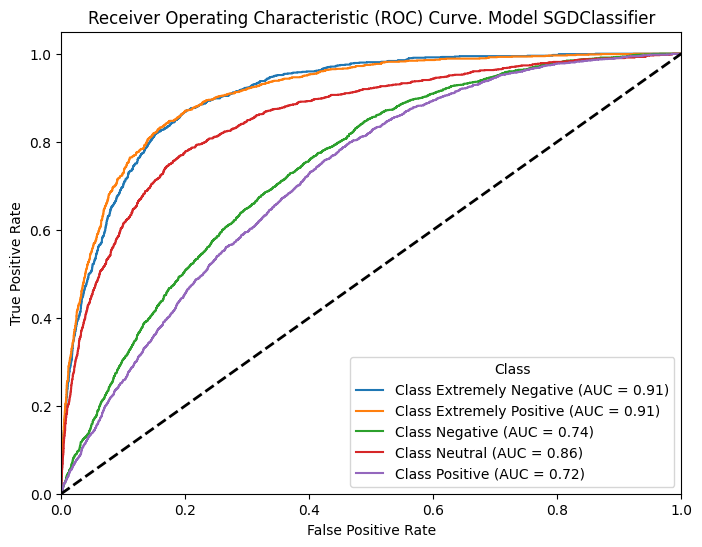

In [46]:
plot_roc_curve(y_valid_sdg, y_pred_proba_sdg, classes=sgd_classifier.classes_, model_name='SGDClassifier')

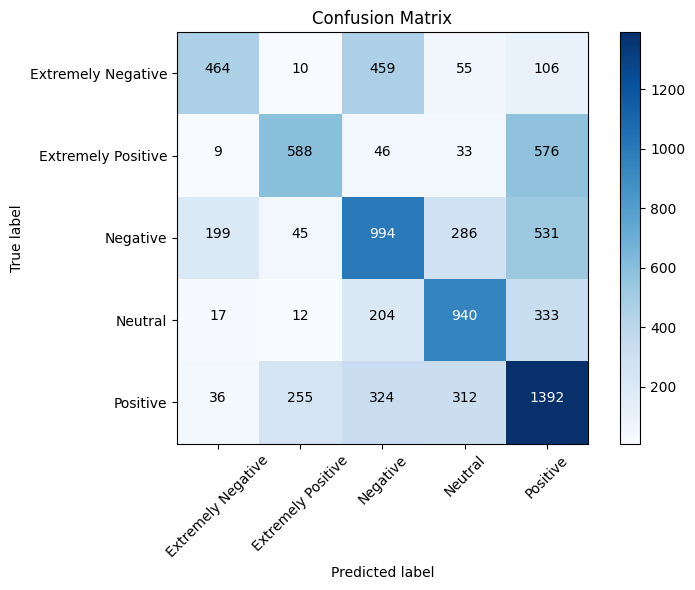

In [47]:
plot_confusion_matrix(y_valid_sdg, y_pred_sdg, classes=sgd_classifier.classes_)

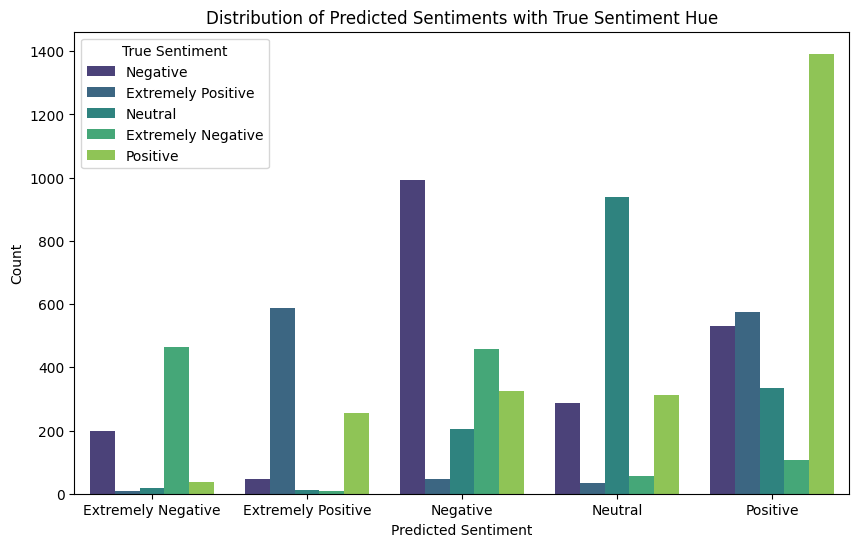

In [48]:
plot_predicted_distribution(y_valid_sdg, y_pred_sdg, classes=sgd_classifier.classes_, palette='viridis')

### Conclusion:

SGDClassifier shows better results than Naive Bayes classifier

#### Differences between naive heuristic and naive Bayes

In [49]:
differences = differece_between_reports(sdg_report, report_nb)
print("Percentage Differences:")
for metric, diff_percentage in differences.items():
    print(f"{metric}: {diff_percentage:.2f}%")
print('-------------------------------------------------------------')
print(f'ROC auc difference: {(roc_auc_sdg - roc_auc_nb) * 100:.2f}%')

Percentage Differences:
Extremely Negative: 4.00%
Extremely Positive: 5.25%
Negative: 0.75%
Neutral: 8.25%
Positive: 1.75%
accuracy: 2.50%
macro avg: 4.00%
weighted avg: 3.50%
-------------------------------------------------------------
ROC auc difference: 4.29%


## ExtraTreesClassifier

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [51]:
X_etc = data[['Text_Length', 'Normalized_Text']]
y_etc = data['Sentiment']

### Split the data into training and testing sets

In [52]:
X_train_etc, X_test_etc, y_train_etc, y_test_etc = train_test_split(X_etc, y_etc, test_size=0.2, random_state=42)

### Convert text data to TF-IDF vectors

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf_etc = tfidf_vectorizer.fit_transform(X_train_etc['Normalized_Text'])
X_test_tfidf_etc = tfidf_vectorizer.transform(X_test_etc['Normalized_Text'])


### Train an ExtraTreesClassifier

In [54]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight=cw, n_jobs=-1)
etc.fit(X_train_tfidf_etc, y_train_etc)

ExtraTreesClassifier(class_weight={'Extremely Negative': 1.4999772053795304,
                                   'Extremely Positive': 1.2249441548771407,
                                   'Negative': 0.8370945172369928,
                                   'Neutral': 1.064617375829154,
                                   'Positive': 0.7230414240193386},
                     n_jobs=-1, random_state=42)

### Make predictions on the test set

In [55]:
y_pred_etc = etc.predict(X_test_tfidf_etc)

In [56]:
y_pred_proba_etc = etc.predict_proba(X_test_tfidf_etc)

In [57]:
# Calculate ROC-AUC
roc_auc_etc = roc_auc_score(y_test_etc, etc.predict_proba(X_test_tfidf_etc), multi_class='ovr')  # For multiclass classification
print(f'ROC-AUC: {roc_auc_etc}')

ROC-AUC: 0.8586874634882949


### Evaluate the model

In [58]:
accuracy_etc = accuracy_score(y_test_etc, y_pred_etc)
print(f'Accuracy: {accuracy_etc}')
etc_report = classification_report(y_test_etc, y_pred_etc)
print(etc_report)

Accuracy: 0.5795040116703136
                    precision    recall  f1-score   support

Extremely Negative       0.63      0.49      0.55      1094
Extremely Positive       0.61      0.51      0.56      1252
          Negative       0.55      0.53      0.54      2055
           Neutral       0.65      0.75      0.70      1506
          Positive       0.52      0.59      0.56      2319

          accuracy                           0.58      8226
         macro avg       0.59      0.57      0.58      8226
      weighted avg       0.58      0.58      0.58      8226



### Plot the ROC curve

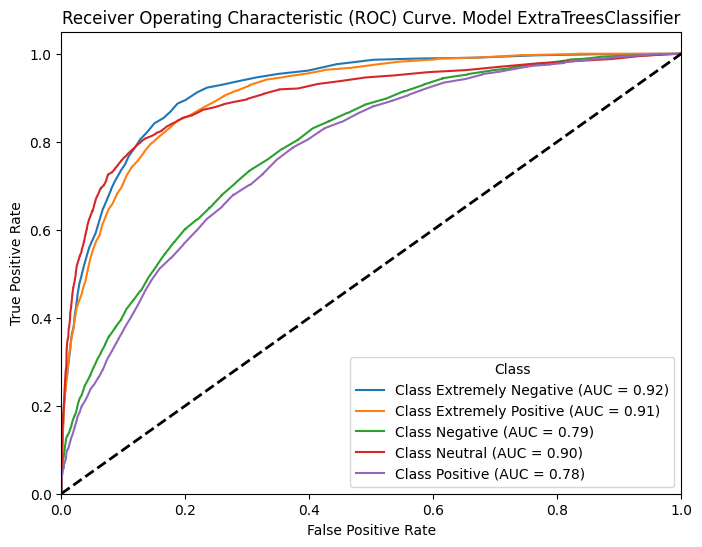

In [59]:
plot_roc_curve(y_test_etc, y_pred_proba_etc, classes=etc.classes_, model_name='ExtraTreesClassifier')


### Plot confusion matrix as a heatmap

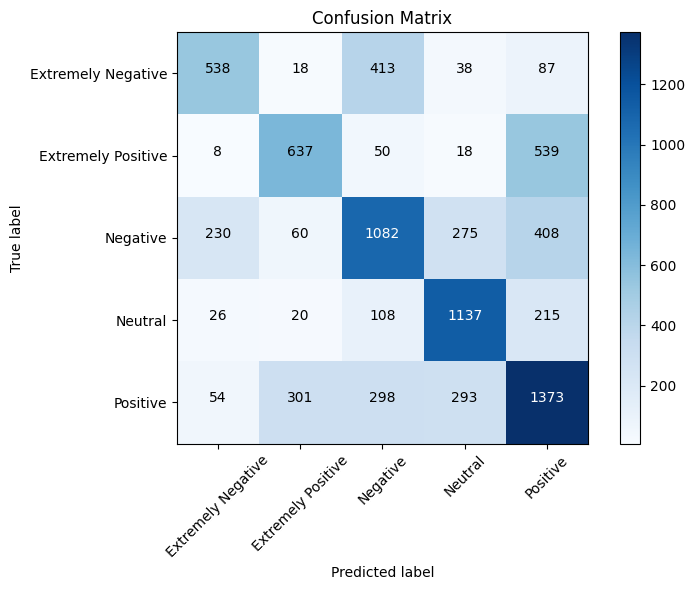

In [60]:
plot_confusion_matrix(y_test_etc, y_pred_etc, classes=etc.classes_)

### Plot the distribution of predicted sentiments with a hue on true sentiments

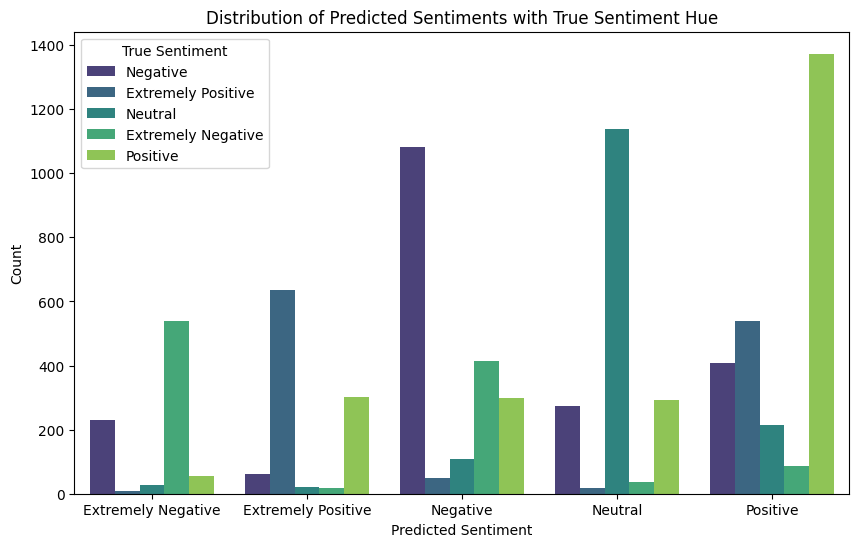

In [61]:
plot_predicted_distribution(y_test_etc, y_pred_etc, classes=etc.classes_, palette='viridis')

### Conclusion:

ExtraTreesClassifier shows a litter better results than SGDClassifier

In [62]:
differences = differece_between_reports(etc_report, sdg_report)
print("Percentage Differences:")
for metric, diff_percentage in differences.items():
    print(f"{metric}: {diff_percentage:.2f}%")
print('-------------------------------------------------------------')
print(f'ROC auc difference: {(roc_auc_sdg - roc_auc_nb) * 100:.2f}%')

Percentage Differences:
Extremely Negative: 2.50%
Extremely Positive: 0.50%
Negative: 4.00%
Neutral: 7.50%
Positive: 1.75%
accuracy: 2.50%
macro avg: 3.00%
weighted avg: 3.25%
-------------------------------------------------------------
ROC auc difference: 4.29%


## XGBoost

In [63]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [64]:
X_xgb = data[['Text_Length', 'Normalized_Text']]
y_xgb = data['Sentiment']

### Convert string labels to integers using LabelEncoder

In [65]:
label_encoder = LabelEncoder()
label_encoder.fit(y_xgb)
y_encoded_xgb = label_encoder.transform(y_xgb)

### Split the data into training and testing sets

In [66]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_encoded_xgb, test_size=0.2, random_state=42)


### Convert text data to TF-IDF vectors

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf_xgb = tfidf_vectorizer.fit_transform(X_train_xgb['Normalized_Text'])
X_test_tfidf_xgb = tfidf_vectorizer.transform(X_test_xgb['Normalized_Text'])

### Convert data to DMatrix format for XGBoost

In [68]:
dtrain_xgb = xgb.DMatrix(X_train_tfidf_xgb, label=y_train_xgb)
dtest_xgb = xgb.DMatrix(X_test_tfidf_xgb, label=y_test_xgb)

### Set XGBoost parameters

In [69]:
xgb_params = {
    'objective': 'multi:softprob',  # for multiclass classification
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss',  # mlologloss for multiclass classification
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'nthread': -1  # use all available cores
}

### Train XGBoost model

In [70]:
num_rounds = 200
bst = xgb.train(xgb_params, dtrain_xgb, num_rounds)

### Make probability estimates on the test set

In [71]:
y_pred_proba_xgb = bst.predict(dtest_xgb)

### Calculate ROC-AUC

In [72]:
roc_auc_xgb = roc_auc_score(y_test_xgb, y_pred_proba_xgb, multi_class='ovr')  # For multiclass classification
print(f'ROC-AUC: {roc_auc_xgb}')

ROC-AUC: 0.826997463405854


### Convert probability estimates to labels

In [73]:
y_pred_xgb = [np.argmax(probabilities) for probabilities in y_pred_proba_xgb]

### Evaluate the model

In [74]:
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f'Accuracy: {accuracy}')
xgb_report = classification_report(y_test_xgb, y_pred_xgb, target_names=label_encoder.classes_)
print(xgb_report)

Accuracy: 0.5365912958910771
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.49      0.54      1094
Extremely Positive       0.66      0.51      0.57      1252
          Negative       0.52      0.42      0.46      2055
           Neutral       0.55      0.69      0.61      1506
          Positive       0.47      0.58      0.52      2319

          accuracy                           0.54      8226
         macro avg       0.56      0.54      0.54      8226
      weighted avg       0.54      0.54      0.53      8226



### Plot the ROC curve

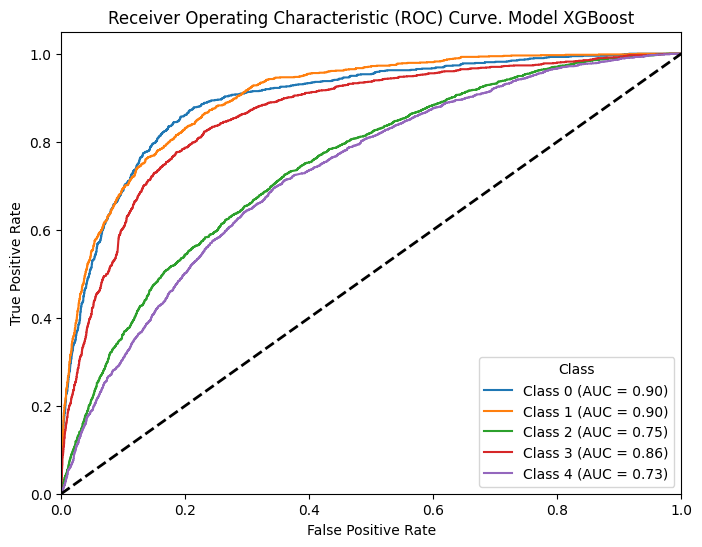

In [75]:
plot_roc_curve(y_test_xgb, y_pred_proba_xgb, classes=label_encoder.classes_, model_name='XGBoost')

### Plot confusion matrix as a heatmap

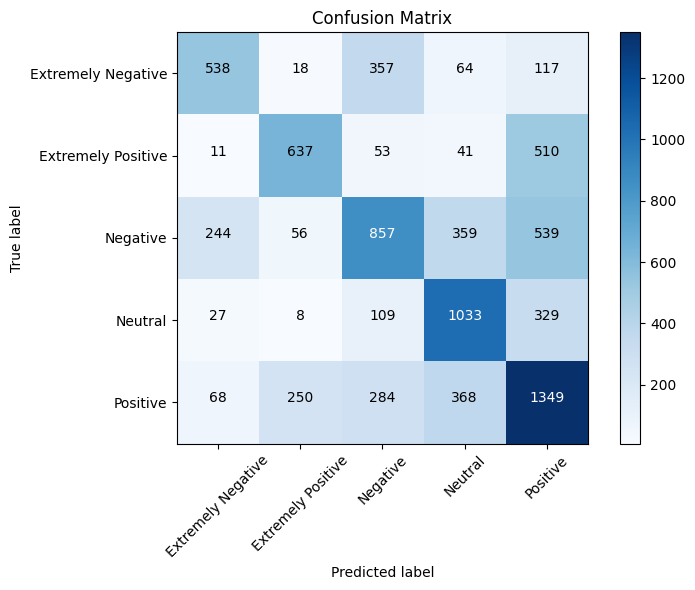

In [76]:
plot_confusion_matrix(y_test_xgb, y_pred_xgb, classes=label_encoder.classes_)

### Plot the distribution of predicted sentiments with a hue on true sentiments

### Conclusion:

XGBoost shows results worse than ExtraTreesClassifier, and almost the same as SGDClassifier

### Differences between ExtraTreesClassifier and XGBoost

In [77]:
differences = differece_between_reports(xgb_report, etc_report)
print("Percentage Differences:")
for metric, diff_percentage in differences.items():
    print(f"{metric}: {diff_percentage:.2f}%")
print('-------------------------------------------------------------')
print(f'ROC auc difference: {(roc_auc_xgb - roc_auc_etc) * 100:.2f}%')

Percentage Differences:
Extremely Negative: -0.75%
Extremely Positive: 1.50%
Negative: -5.50%
Neutral: -6.25%
Positive: -2.50%
accuracy: -2.00%
macro avg: -2.50%
weighted avg: -3.25%
-------------------------------------------------------------
ROC auc difference: -3.17%


### Differences between XGBoost and SDGClassifier

In [78]:
differences = differece_between_reports(xgb_report, sdg_report)
print("Percentage Differences:")
for metric, diff_percentage in differences.items():
    print(f"{metric}: {diff_percentage:.2f}%")
print('-------------------------------------------------------------')
print(f'ROC auc difference: {(roc_auc_xgb - roc_auc_sdg) * 100:.2f}%')

Percentage Differences:
Extremely Negative: 1.75%
Extremely Positive: 2.00%
Negative: -1.50%
Neutral: 1.25%
Positive: -0.75%
accuracy: 0.50%
macro avg: 0.50%
weighted avg: 0.00%
-------------------------------------------------------------
ROC auc difference: 0.00%
